**Описание проекта:** имеем данные о доходах мужчин и женщин в 4 городах.  
Хотим провести анализ на основе датасета.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!gdown --id 1NfIGERt8S3wPTVO9uNcmhf9b772959h0

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NfIGERt8S3wPTVO9uNcmhf9b772959h0
To: /content/people_income.csv
100% 9.08k/9.08k [00:00<00:00, 9.76MB/s]


In [3]:
data = pd.read_csv('people_income.csv')

In [4]:
data.head()

,Age,Gender,Education,Income,City
0,43,Male,PhD,56152.632972,Chicago
1,52,Male,High School,44195.055134,New York
2,36,Female,PhD,58253.913117,Chicago
3,48,Female,High School,42331.954451,Houston
4,21,Male,Bachelor,35347.721779,Houston


In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        200 non-null    int64  
 1   gender     200 non-null    object 
 2   education  200 non-null    object 
 3   income     200 non-null    float64
 4   city       200 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [7]:
data.city.unique()

array(['Chicago', 'New York', 'Houston', 'Los Angeles'], dtype=object)

In [25]:
data.groupby('city')['income'].mean()

city
Chicago        49626.258800
Houston        46926.737000
Los Angeles    50084.877872
New York       50232.306226
Name: income, dtype: float64

In [26]:
data.groupby('city')['income'].min()

city
Chicago        24223.06
Houston        25761.48
Los Angeles    17228.62
New York       28898.39
Name: income, dtype: float64

In [27]:
data.groupby('city')['income'].max()

city
Chicago        66714.53
Houston        79358.60
Los Angeles    72878.74
New York       70466.17
Name: income, dtype: float64

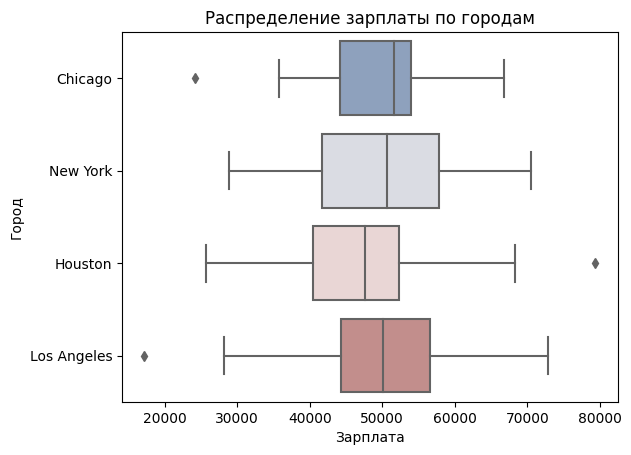

In [8]:
sns.boxplot(x="income", y="city", data=data, palette="vlag")
plt.title('Распределение зарплаты по городам')
plt.xlabel('Зарплата')
plt.ylabel('Город')
plt.show()

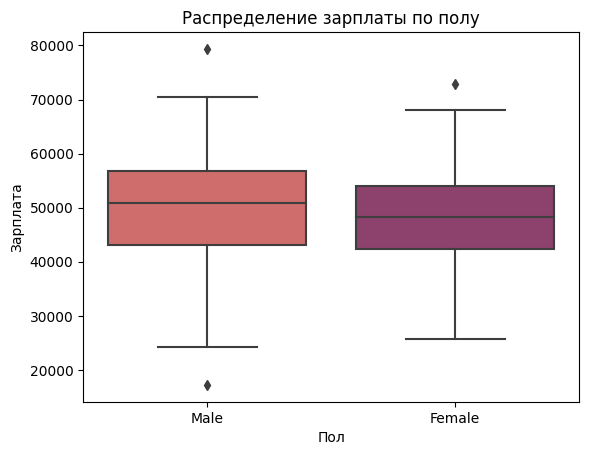

In [9]:
sns.boxplot(x="gender", y="income", data=data, palette="flare")
plt.title('Распределение зарплаты по полу')
plt.xlabel('Пол')
plt.ylabel('Зарплата')
plt.show()

In [10]:
data['income'] = round(data['income'],2)

In [11]:
pivot_t = pd.pivot_table(data, values='income', index=['city', 'gender'],
                        aggfunc=[min, np.average, max])
pivot_t

min       average       max
                      income        income    income
city        gender                                  
Chicago     Female  35745.14  49994.585909  63447.61
            Male    24223.06  49336.858929  66714.53
Houston     Female  25761.48  43340.125000  52608.34
            Male    26876.36  50237.455769  79358.60
Los Angeles Female  35066.38  51715.848636  72878.74
            Male    17228.62  48649.623600  69985.35
New York    Female  34871.69  49124.095200  68055.10
            Male    28898.39  51221.780357  70466.17

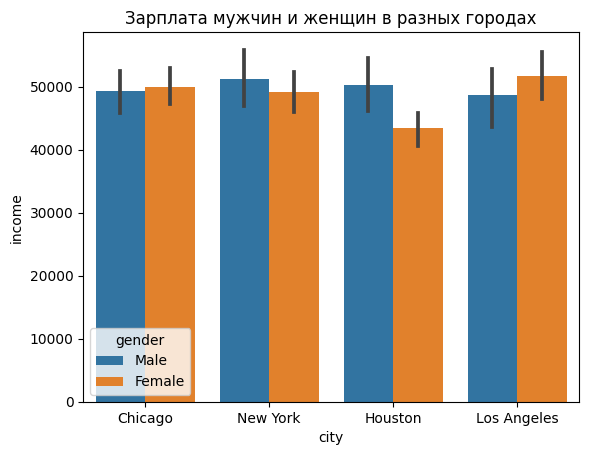

In [12]:
sns.barplot(x="city", y="income", hue="gender", data=data)
plt.title('Зарплата мужчин и женщин в разных городах')
plt.show()

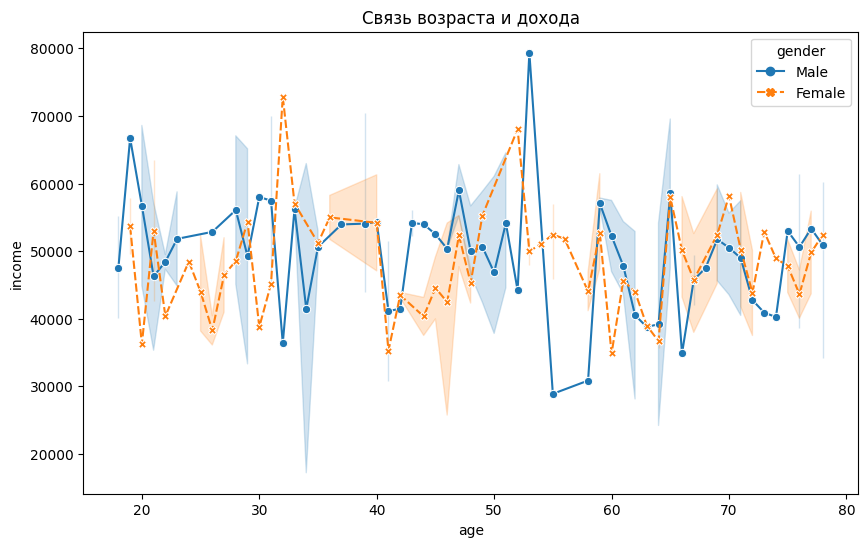

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='age', y='income', hue='gender', style='gender', markers=True)
plt.title('Связь возраста и дохода')
plt.show()

## Вывод

Видим, что средняя зарплата меньше всего в Хьюстоне - 46 926, тогда как в других городах около 50 000. Разброс зарплат в городах довольно большой - примерно от 25 000 до 72 000, но в Чикаго разброс меньше - от 25 000 до 66 000.  
Мужчины получают чуть больше, чем женщины. Если сравнивать по городам, то в Лос-Анджелесе и в Чикаго женщины имеют бОльший доход, чем мужчины.  
Рассмотрим доход в зависимости от возраста. Видим, что в возрасте от 20 до 30 лет мужчины получают существенно больше женщин. Затем наблюдается резкий упадок, тогда как у женщин, наоборот, резкий скачок в уровне дохода. Так же у женщин наблюдается скачок после 48 лет, а у мужчин есть резкие колебания после 50 и до 60. Затем они получают примерно одинаково.